In [1]:
import numpy as np
import os
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
data_dir = '/home/owaismujtaba/projects/NeuroLab/Results/TrainedModels'


In [20]:
results = {}
for subject in range(1, 31):
    if subject< 10:
        subject = f'0{subject}'
    sub_dir = Path(data_dir, str(subject))
    model_dir = Path(sub_dir, 'LR')
    files = os.listdir(model_dir)

    pcc_values = []
    for file in files:
        file_dir = Path(model_dir, file)
        file_data = np.load(file_dir)
        pcc_values.append(float(file_data[-1]))
    results[subject] = pcc_values
    
    

In [16]:
results2 = {}
for subject in range(1, 31):
    if subject< 10:
        subject = f'0{subject}'
    sub_dir = Path(data_dir, str(subject))
    model_dir = Path(sub_dir, 'NeuralNetworkFinal')
    files = os.listdir(model_dir)

    pcc_values = []
    for file in files:
        file_dir = Path(model_dir, file)
        file_data = np.load(file_dir)
        pcc_values.append(float(file_data[-1]))
    results2[subject] = pcc_values

In [17]:
results2

{'01': [0.5563593278190296,
  0.6332074516307714,
  0.657139983657919,
  0.6330648891920064,
  0.6656980597912501],
 '02': [0.5751656691540104,
  0.5335062675790486,
  0.6454270038709501,
  0.6345778317496908,
  0.5359311994881528],
 '03': [0.806855741114155,
  0.7595782169983549,
  0.8464464527325973,
  0.8119007132716413,
  0.806833835500432],
 '04': [0.8353206227677776,
  0.7584737556770912,
  0.787121127320569,
  0.7393050270454831,
  0.8089991390075079],
 '05': [0.5595248602859085,
  0.6009579210181495,
  0.505343665117876,
  0.39763008062163036,
  0.6200043779038007],
 '06': [0.8580564467436503,
  0.8142060192886857,
  0.7996288655834437,
  0.8170360819771187,
  0.8364025335660898],
 '07': [0.040011716321021136,
  0.05299510705662482,
  0.11056815681806709,
  -0.04857989944116699,
  0.14437886804149783],
 '08': [0.6224477781358897,
  0.5864515051727537,
  0.5414411979425312,
  0.6217342026083504,
  0.6450358051060815],
 '09': [0.7178933475289987,
  0.7600974352469693,
  0.7523518

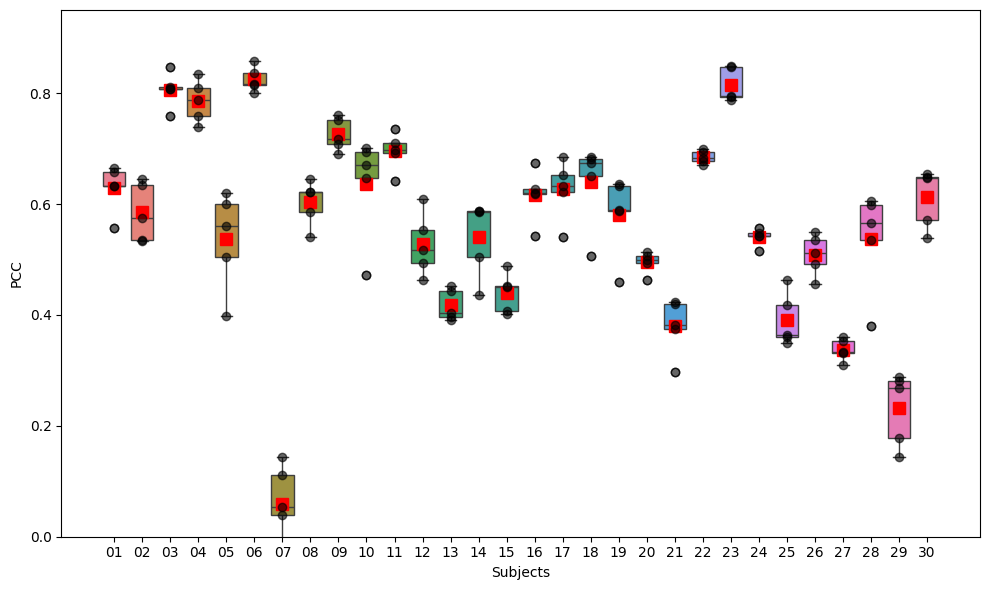

In [18]:
data =results2
subjects = list(data.keys())
values = list(data.values())

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=values, zorder=1)

# Add the mean as a square marker
for i, subject_values in enumerate(values):
    mean_value = np.mean(subject_values)
    plt.plot(i, mean_value, marker='s', color='red', markersize=8, label='Mean' if i == 0 else "")

# Add individual data points on top of the box plot
for i, subject_values in enumerate(values):
    plt.scatter([i] * len(subject_values), subject_values, color='black', alpha=0.6, zorder=2, label='Data points' if i == 0 else "")

# Customize the plot
plt.xticks(ticks=np.arange(len(subjects)), labels=subjects)
plt.xlabel("Subjects")
plt.ylabel("PCC")
plt.ylim([0, 0.95])
plt.tight_layout()
plt.savefig('Images/pcc.png', dpi=800)

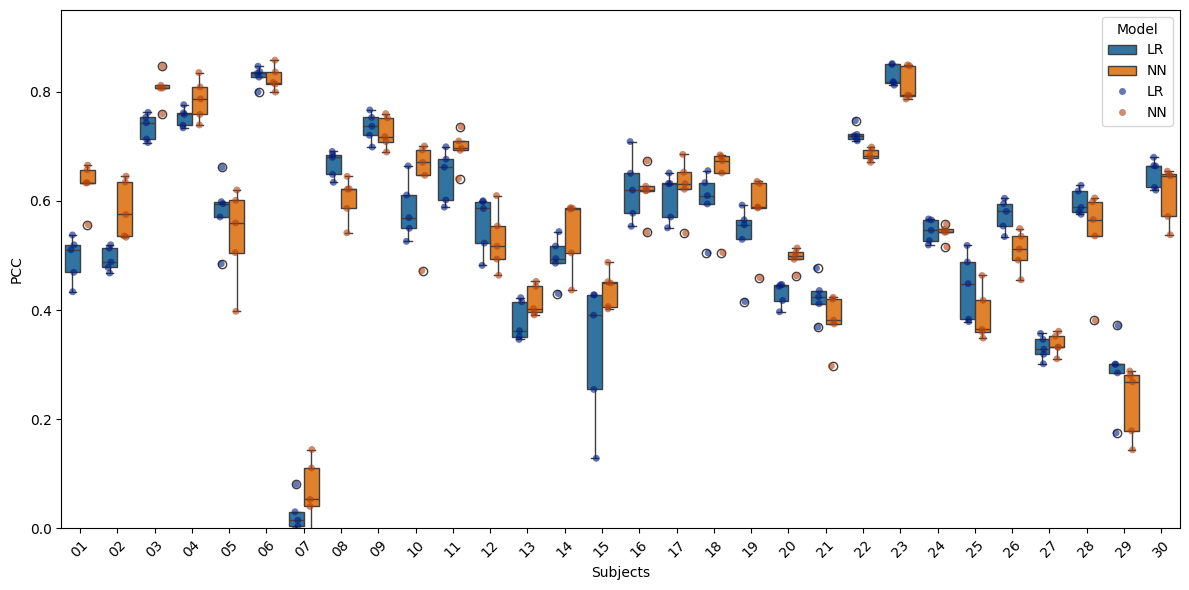

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming data1 and data2 are your two datasets
data1 = results  # First dataset
data2 = results2  # Second dataset

subjects = list(data1.keys())

# Convert to long format DataFrame
df1 = pd.DataFrame({"Subject": np.repeat(subjects, [len(data1[s]) for s in subjects]), 
                    "PCC": np.concatenate(list(data1.values())), 
                    "Condition": "LR"})

df2 = pd.DataFrame({"Subject": np.repeat(subjects, [len(data2[s]) for s in subjects]), 
                    "PCC": np.concatenate(list(data2.values())), 
                    "Condition": "NN"})

df = pd.concat([df1, df2], ignore_index=True)

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Subject", y="PCC", hue="Condition", data=df, zorder=1)

# Overlay individual data points
sns.stripplot(x="Subject", y="PCC", hue="Condition", data=df, 
              dodge=True, jitter=True, marker='o', alpha=0.6, palette="dark", zorder=2)

# Customize
plt.xlabel("Subjects")
plt.ylabel("PCC")
plt.ylim([0, 0.95])
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()
plt.savefig('Images/pcc_comparison.png', dpi=800)
plt.show()


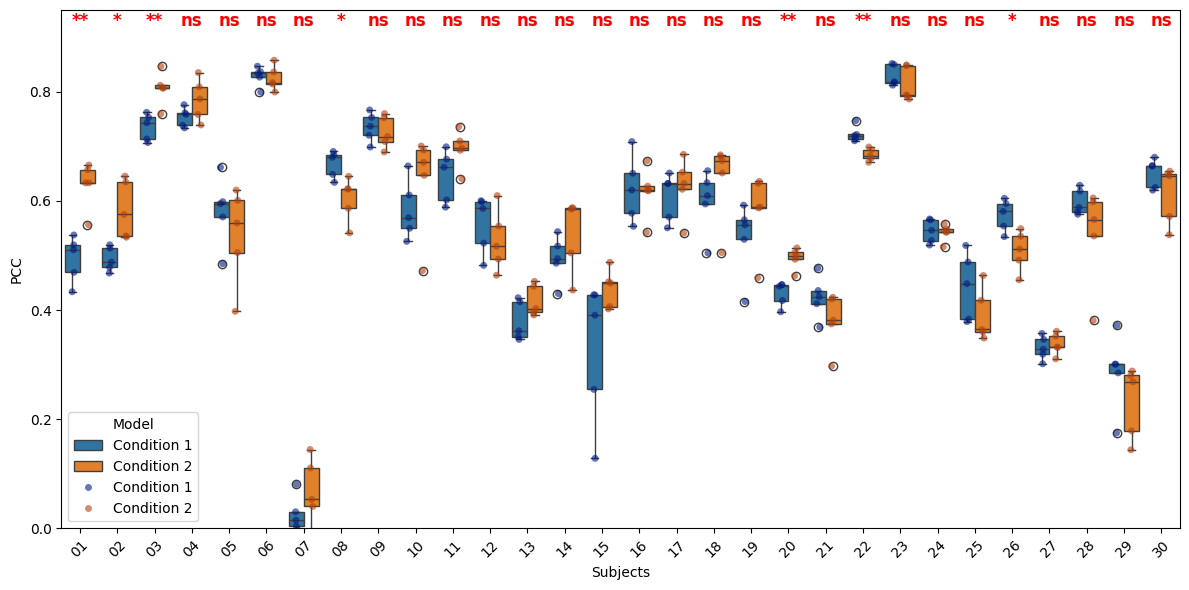

In [27]:
from scipy.stats import ttest_ind
data1 = results  # First dataset
data2 = results2  # Second dataset

subjects = list(data1.keys())

# Convert to long format DataFrame
df1 = pd.DataFrame({"Subject": np.repeat(subjects, [len(data1[s]) for s in subjects]), 
                    "PCC": np.concatenate(list(data1.values())), 
                    "Condition": "Condition 1"})

df2 = pd.DataFrame({"Subject": np.repeat(subjects, [len(data2[s]) for s in subjects]), 
                    "PCC": np.concatenate(list(data2.values())), 
                    "Condition": "Condition 2"})

df = pd.concat([df1, df2], ignore_index=True)

# Compute p-values for each subject
p_values = {}
for subject in subjects:
    p_val = ttest_ind(data1[subject], data2[subject], equal_var=False).pvalue  # Unpaired t-test
    p_values[subject] = p_val

# Significance levels
def significance_marker(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'  # Not significant

# Create a box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="Subject", y="PCC", hue="Condition", data=df, zorder=1)

# Overlay individual data points
sns.stripplot(x="Subject", y="PCC", hue="Condition", data=df, 
              dodge=True, jitter=True, marker='o', alpha=0.6, palette="dark", zorder=2)

# Annotate with p-values
x_positions = np.arange(len(subjects))
for i, subject in enumerate(subjects):
    p_val = p_values[subject]
    marker = significance_marker(p_val)
    
    # Place text annotation
    ax.text(i, 0.92, marker, ha='center', fontsize=12, fontweight='bold', color='red')

# Customize plot
plt.xlabel("Subjects")
plt.ylabel("PCC")
plt.ylim([0, 0.95])
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()
plt.savefig('Images/pcc_comparison.png', dpi=800)
plt.show()


In [28]:
df

,Subject,PCC,Condition
0,01,0.433538,Condition 1
1,01,0.510426,Condition 1
2,01,0.537620,Condition 1
3,01,0.469164,Condition 1
4,01,0.519559,Condition 1
...,...,...,...
295,30,0.646239,Condition 2
296,30,0.538007,Condition 2
297,30,0.654551,Condition 2
298,30,0.649129,Condition 2


In [30]:
data['01']

[0.5563593278190296,
 0.6332074516307714,
 0.657139983657919,
 0.6330648891920064,
 0.6656980597912501]

In [26]:
significant_results = []
for subject in subjects:
    p_val = ttest_ind(results[subject], results2[subject], equal_var=False).pvalue  # Unpaired t-test
    if p_val < 0.05:  # Filter significant results
        mean_pcc_1 = np.mean(results[subject])
        mean_pcc_2 = np.mean(results2[subject])
        significant_results.append([subject, mean_pcc_1, mean_pcc_2, p_val])

# Create a DataFrame
significant_df = pd.DataFrame(significant_results, columns=["Subject", "Mean PCC (LR)", "Mean PCC (NN)", "p-value"])

# Sort by p-value (optional)
significant_df = significant_df.sort_values(by="p-value")

# Display table
print(significant_df)

  Subject  Mean PCC (LR)  Mean PCC (NN)   p-value
0      01       0.494061       0.629094  0.001046
4      20       0.430181       0.494862  0.001284
5      22       0.722522       0.684989  0.002175
2      03       0.735874       0.806323  0.004415
1      02       0.493403       0.584922  0.014449
6      26       0.573887       0.508717  0.015828
3      08       0.667708       0.603422  0.020513


In [4]:
seeg = np.load('Data\P01_sEEG.npy')
seeg.shape

(307511, 130)

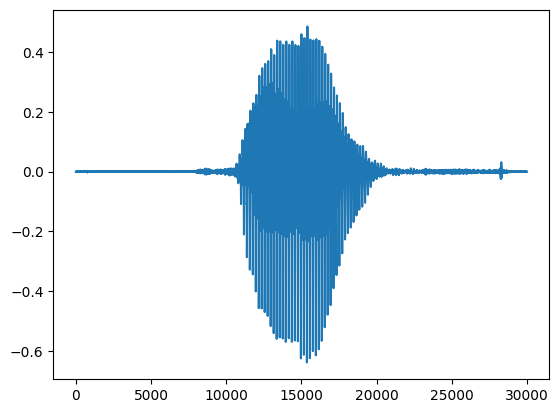

In [ ]:
plt.plot(audio[30000:60000])


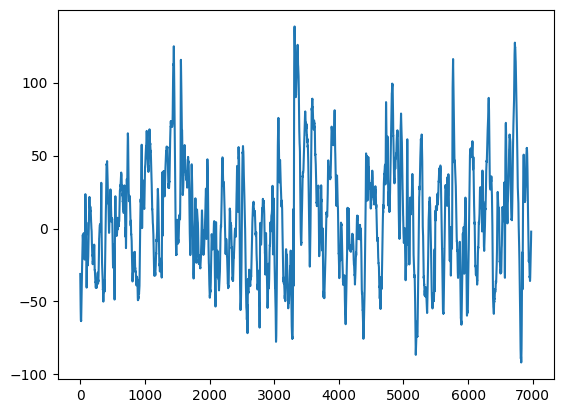

In [16]:
sample = seeg[1024:8000]
sample = np.mean(sample, axis=1)
sample.shape
plt.plot(sample)

In [9]:
seeg.shape

(307511, 130)